In [1]:
## Simple tf.keras Sequential model

import numpy as np
import tensorflow as tf
import plot_confusion_matrix as pcm

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import confusion_matrix

2023-05-21 18:24:25.218296: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
train_labels = []
train_samples = []

##dummy data

for i in range(50):
    # The ~5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)

    # The ~5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range(1000):
    # The ~95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)

    # The ~95% of older individuals who did experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)

train_samples = np.array(train_samples)
train_labels = np.array(train_labels)
train_labels, train_samples = shuffle(train_labels, train_samples) #shuffle both train_labels and train_samples  to remove any order that was imposed on the data during the creation process

scaler = MinMaxScaler(feature_range=(0,1))  #scale all of the data down from a scale ranging from 13 to 100 to be on a scale from 0 to 1
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1)) #reshape the data as a technical requirement just since the fit_transform() function doesn't accept 1D data by default

In [3]:
#model is an instance of a Sequential object. A tf.keras.Sequential model is a linear stack of layers. It accepts a list, and each element in the list should be a layer.
#A Dense layer is our standard fully-connected or densely-connected neural network layer
#The input data defines the input layer shape
#The model first layer defines the first hidden layer

model = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),   #the input_shape data is one-dimensional in this case
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')                    #the output layer will have 2 neurons because we have two possible outputs: either a patient experienced side effects, or the patient did not experience side effects.
])


model.summary()

2023-05-21 18:25:43.437964: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-05-21 18:25:43.438493: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-05-21 18:25:43.442443: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-21 18:25:43.442561: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1650 computeCapability: 7.5
coreClock: 1.635GHz coreCount: 14 deviceMemorySize: 3.81GiB deviceMemoryBandwidth: 178.84GiB/s
2023-05-21 18:25:43.442581: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2023-05-21 18:25:43.443743: I tensorflow/stream_executor/platform/de

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


o returning NUMA node zero
2023-05-21 18:25:43.449113: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-21 18:25:43.449176: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1862] Adding visible gpu devices: 0
2023-05-21 18:25:43.449636: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-21 18:25:43.449942: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-05-21 18:25:43.450021: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative valu

In [4]:
model.compile(optimizer=Adam(learning_rate=0.1), loss='sparse_categorical_crossentropy', metrics=['accuracy'])  #This function configures the model for training

#model.compile tear apart
##Adam optimization is a stochastic gradient descent (SGD) method
##The next parameter we specify is loss. We'll be using sparse_categorical_crossentropy
##The last parameter we specify is metrics. This parameter expects a list of metrics that we'd like to be evaluated by the model during training and testing. We'll set this to a list that contains the string ‘accuracy'.

In [5]:
#Train using fit
#model.fit(x=scaled_train_samples, y=train_labels, batch_size=10, epochs=30, verbose=2)

#model.fit tear apart
#The batch size is the number of samples that are passed to the network at once.
#Lastly, we specify verbose=2. This just specifies how much output to the console we want to see during each epoch of training. The verbosity levels range from 0 to 2, so we're getting the most verbose output.

# IF we use a validation set, using a 10% of the training data, the model will not train on it, but evaluate the loss and any model metrics on this data at the end of each epoch.
model.fit(
      x=scaled_train_samples
    , y=train_labels
    , validation_split=0.1
    , batch_size=10
    , epochs=30
    , verbose=2
)

2023-05-21 18:27:27.327585: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2023-05-21 18:27:27.327939: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 4099895000 Hz
2023-05-21 18:27:27.520791: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10


Epoch 1/30
189/189 - 1s - loss: 0.3199 - accuracy: 0.8921 - val_loss: 0.3773 - val_accuracy: 0.9190
Epoch 2/30
189/189 - 0s - loss: 0.2529 - accuracy: 0.9222 - val_loss: 0.3538 - val_accuracy: 0.9095
Epoch 3/30
189/189 - 0s - loss: 0.2672 - accuracy: 0.9180 - val_loss: 0.4768 - val_accuracy: 0.8143
Epoch 4/30
189/189 - 0s - loss: 0.2440 - accuracy: 0.9233 - val_loss: 0.2824 - val_accuracy: 0.9333
Epoch 5/30
189/189 - 0s - loss: 0.2595 - accuracy: 0.9159 - val_loss: 0.3391 - val_accuracy: 0.9000
Epoch 6/30
189/189 - 0s - loss: 0.2685 - accuracy: 0.9185 - val_loss: 0.2872 - val_accuracy: 0.9286
Epoch 7/30
189/189 - 0s - loss: 0.2356 - accuracy: 0.9317 - val_loss: 0.2754 - val_accuracy: 0.9333
Epoch 8/30
189/189 - 0s - loss: 0.2492 - accuracy: 0.9254 - val_loss: 0.3242 - val_accuracy: 0.8762
Epoch 9/30
189/189 - 0s - loss: 0.2302 - accuracy: 0.9286 - val_loss: 0.4068 - val_accuracy: 0.8524
Epoch 10/30
189/189 - 0s - loss: 0.2363 - accuracy: 0.9259 - val_loss: 0.3630 - val_accuracy: 0.9000

In [6]:
### Inference
## Testing the Training of the Neural Network with a data set

test_labels =  []
test_samples = []

for i in range(10):
    # The 5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)

    # The 5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(200):
    # The 95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)

    # The 95% of older individuals who did experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)

scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

In [7]:
#We quest the Neural Netowork with the test set

predictions = model.predict(
      x=scaled_test_samples
    , batch_size=10
    , verbose=0 # The output from the predictions won't be relevant for us, so we're setting verbose=0 for no output.
)  

rounded_predictions = np.argmax(predictions, axis=-1)   #most probable prediction.

Confusion matrix, without normalization
[[194  16]
 [ 10 200]]


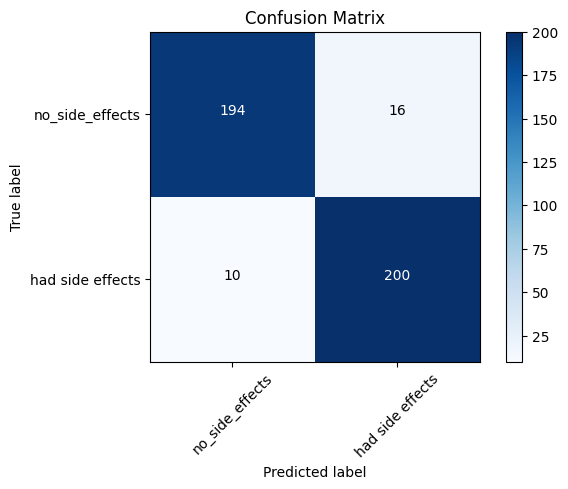

In [8]:
## Confusion matrix: it will able us to read the predictions from the model easily

cm=confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)     #we define the labels for the confusion matrix
cm_plot_labels=['no_side_effects', 'had side effects']
pcm.plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')  # plot the matrix with the function given

In [9]:
# model.save() is for saving a model at its current state after it was trained so that we could make use of it later, we pass in the file path and name of the file we want to save the model to with an h5 extension

model.save('models/medical_trial_model.h5')

In [11]:
json_string = model.to_json()   # this function will only save the architecture of the model. This will not save the model weights, configurations, optimizer, loss or anything else
print(json_string)

{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_input"}}, {"class_name": "Dense", "config": {"name": "dense", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_re